In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt
from math import ceil
import os

In [2]:
beam,lattice = impact.readInputFile('test_IOTA.in')
ke = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency

reading ImpactZ input file (test_IOTA.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [3]:
chad   = impact.data.dictClass()
kilean = impact.data.dictClass()

# fort.24

In [4]:
chad['X']   = impact.readRMS('x',fileLoc='./Chad/')
kilean['X'] = impact.readRMS('x',fileLoc='./Kilean/')
chad.n1 = np.argmin(np.abs(chad.X.s-360.0))
kilean.n1 = np.argmin(np.abs(chad.X.s-360.0))

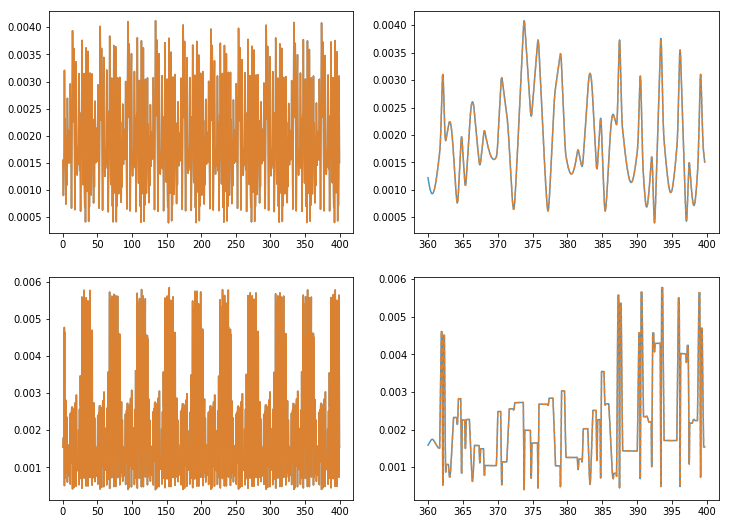

In [5]:
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
plt.plot(chad.X.s,chad.X.rms_x,alpha=0.8)
plt.plot(kilean.X.s,kilean.X.rms_x,alpha=0.8)
plt.subplot(2,2,2)
plt.plot(chad.X.s[chad.n1:-1],chad.X.rms_x[chad.n1:-1],alpha=0.8)
plt.plot(kilean.X.s[kilean.n1:-1],kilean.X.rms_x[kilean.n1:-1],alpha=0.8,linestyle='--')
plt.subplot(2,2,3)
plt.plot(chad.X.s,chad.X.rms_px,alpha=0.8)
plt.plot(kilean.X.s,kilean.X.rms_px,alpha=0.8)
plt.subplot(2,2,4)
plt.plot(chad.X.s[chad.n1:-1],chad.X.rms_px[chad.n1:-1],alpha=0.8)
plt.plot(kilean.X.s[kilean.n1:-1],kilean.X.rms_px[kilean.n1:-1],alpha=0.8,linestyle='--')

# fort.25

In [6]:
chad['Y']   = impact.readRMS('y',fileLoc='./Chad/')
kilean['Y'] = impact.readRMS('y',fileLoc='./Kilean/')
chad.n2 = np.argmin(np.abs(chad.Y.s-360.0))
kilean.n2 = np.argmin(np.abs(chad.Y.s-360.0))
chad.n1 = np.argmin(np.abs(chad.Y.s-340.0))
kilean.n1 = np.argmin(np.abs(chad.Y.s-340.0))

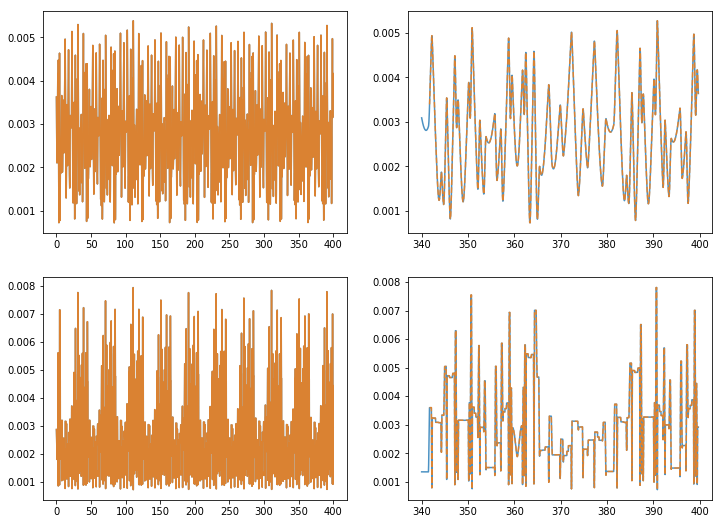

In [7]:
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
plt.plot(chad.Y.s,chad.Y.rms_y,alpha=0.8)
plt.plot(kilean.Y.s,kilean.Y.rms_y,alpha=0.8)
plt.subplot(2,2,2)
plt.plot(chad.Y.s[chad.n1:-1],chad.Y.rms_y[chad.n1:-1],alpha=0.8)
plt.plot(kilean.Y.s[kilean.n1:-1],kilean.Y.rms_y[kilean.n1:-1],alpha=0.8,linestyle='--')
plt.subplot(2,2,3)
plt.plot(chad.Y.s,chad.Y.rms_py,alpha=0.8)
plt.plot(kilean.Y.s,kilean.Y.rms_py,alpha=0.8)
plt.subplot(2,2,4)
plt.plot(chad.Y.s[chad.n1:-1],chad.Y.rms_py[chad.n1:-1],alpha=0.8)
plt.plot(kilean.Y.s[kilean.n1:-1],kilean.Y.rms_py[kilean.n1:-1],alpha=0.8,linestyle='--')

# particle data

In [8]:
chad['raw']   = impact.readParticleData(100,ke,mass,freq,'./Chad/')
kilean['raw'] = impact.readParticleData(10,ke,mass,freq,'./Kilean/')

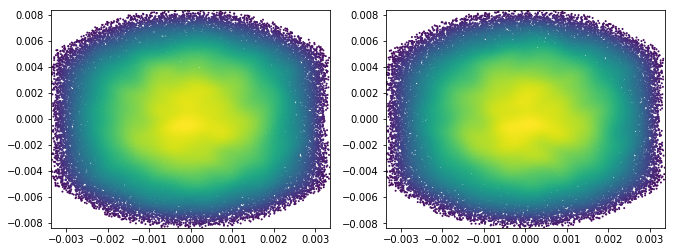

In [9]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
impact.plot.poincare(X=chad.raw[:,0],Y=chad.raw[:,2],samplePeriod=10)
plt.subplot(1,2,2)
impact.plot.poincare(X=kilean.raw[:,0],Y=kilean.raw[:,2],samplePeriod=10)